# Introduction to Zahner Analysis Remote

This example is an introduction to the Python package **zahner_analysis**, which allows equivalent circuit models to be fitted to impedance spectra. The Python library is a client for the [REST interface](https://en.wikipedia.org/wiki/Representational_state_transfer) of the [Zahner Analysis](https://zahner.de/products-details/software/Zahner-Analysis) module Remote Evaluation. This module is [optional and must be selected for installation](https://doc.zahner.de/zahner_analysis/analysis_connection.html#basic-informations) when installing the [Zahner Analysis Software](https://zahner.de/products-details/software/Zahner-Analysis).

A equivalent circuit model for an impedance measurement can be easily developed with the graphical interface of the [Zahner Analysis Software](https://zahner.de/products-details/software/Zahner-Analysis). The *Magic Wand Preset Element Tool* can be used to easily determine suitable initial values for the fit.

<img src="https://doc.zahner.de/github_resources/AnalysisScreenshot.png" alt="Zahner Analysis Model Editor" style="width: 1000px;"/>

With Python the models, which have been created with the GUI, can then be fitted to impedance spectra.
The elements and parameters of the equivalent circuit model can be read and processed with python.

With the Python package [thales_remote](https://github.com/Zahner-elektrik/Thales-Remote-Python) as a supplement, impedance measurements can be performed with a Zennium and immediately evaluated. The [Zahner Analysis Software](https://zahner.de/products-details/software/Zahner-Analysis) is not required for importing and plotting data.

In [1]:
from zahner_analysis.analysis_tools.eis_fitting import EisFitting, EisFittingPlotter
from zahner_analysis.file_import.impedance_model_import import IsfxModelImport
from zahner_analysis.file_import.ism_import import IsmImport
import matplotlib.pyplot as plt

# Import the circuit model and the measurement data

With the class [IsfxModelImport](https://doc.zahner.de/zahner_analysis/file_import/index.html#zahner_analysis.file_import.impedance_model_import.IsfxModelImport) the models created with the [Zahner Analysis Software](https://zahner.de/products-details/software/Zahner-Analysis) are imported in isfx format into Python. isfx is a format based on [XML](https://en.wikipedia.org/wiki/XML). 
The [IsmImport](https://doc.zahner.de/zahner_analysis/file_import/index.html#zahner_analysis.file_import.ism_import.IsmImport) class imports the impedance spectrum data.

The parameters of the not fitted model can be output to the console.

In [2]:
if __name__ == "__main__":
    impedanceCircuitModel = IsfxModelImport("rc-model.isfx")
    impedanceData = IsmImport("rc-data.ism")

    print(impedanceCircuitModel)

capacitor : C0
      C:  1.000e-05 F        fixed: False
resistor : R0
      R:  1.000e+02 Ω        fixed: False



# Create the EisFitting object

Fitting via the REST interface is realized with the [EisFitting](https://doc.zahner.de/zahner_analysis/analyze/index.html#zahner_analysis.analysis_tools.eis_fitting.EisFitting) class. An [AnalysisConnection](https://doc.zahner.de/zahner_analysis/analysis_connection.html#zahner_analysis.analysis_tools.analysis_connection.AnalysisConnection) is optional, which manages the connection to the analysis.

If, as in the example, the constructor is called without an [AnalysisConnection](https://doc.zahner.de/zahner_analysis/analysis_connection.html#zahner_analysis.analysis_tools.analysis_connection.AnalysisConnection), then the class attempts to establish a connection to the REST interface of the Remote Evaluation module of the [Zahner Analysis Software](https://zahner.de/products-details/software/Zahner-Analysis). If the connection cannot be established, then on Windows systems it tries to start the [Zahner Analysis Software](https://zahner.de/products-details/software/Zahner-Analysis) and the REST interface.

In [3]:
fitting = EisFitting()

# Fit the model to the data

The [fit()](https://doc.zahner.de/zahner_analysis/analyze/index.html#zahner_analysis.analysis_tools.eis_fitting.EisFitting.fit) method is then used to fit the model to the data. Optional parameters would also be possible here, which are explained in the [API documentation](https://doc.zahner.de/zahner_analysis/) and are used in another example.

From the [fit()](https://doc.zahner.de/zahner_analysis/analyze/index.html#zahner_analysis.analysis_tools.eis_fitting.EisFitting.fit) method an [EisFittingResult](https://doc.zahner.de/zahner_analysis/analyze/index.html#zahner_analysis.analysis_tools.eis_fitting.EisFittingResult) object is returned, which contains the results.

From this object a [JSON](https://en.wikipedia.org/wiki/JSON) object or string with the fit result can be read ([getFitResultJson()](https://doc.zahner.de/zahner_analysis/analyze/index.html?highlight=eisfittingresult#zahner_analysis.analysis_tools.eis_fitting.EisFittingResult.getFitResultJson)). Then a model with the fitted circuit elements can be read ([getFittedModel()](https://doc.zahner.de/zahner_analysis/analyze/index.html?highlight=eisfittingresult#zahner_analysis.analysis_tools.eis_fitting.EisFittingResult.getFittedModel)) and an impedance object with the simulated model ([getFittedSimulatedData()](https://doc.zahner.de/zahner_analysis/analyze/index.html?highlight=eisfittingresult#zahner_analysis.analysis_tools.eis_fitting.EisFittingResult.getFittedSimulatedData)). Likewise, an impedance object can be read with the samples used for the fit ([getFitInputData()](https://doc.zahner.de/zahner_analysis/analyze/index.html?highlight=eisfittingresult#zahner_analysis.analysis_tools.eis_fitting.EisFittingResult.getFitInputData)).

In [4]:
fittingResult = fitting.fit(impedanceCircuitModel, impedanceData)

If you output the result to the console, the model is output with its parameters and a JSON string containing all additional parameters of the fit.

The JSON also contains parameters like error and significance.

In [5]:
print(fittingResult)

Fitted Model:
capacitor : C0
      C:  1.469e-10 F        fixed: False
resistor : R0
      R:  9.959e+07 Ω        fixed: False
JSON fit result:
{
  "model": {
    "C0": {
      "C": {
        "error": 0.9082683061964946,
        "significance": 0.9999999994736887,
        "value": 1.4691895736476512e-10,
        "value_unit": "F"
      }
    },
    "R0": {
      "R": {
        "error": 0.20287188666539244,
        "significance": 0.9997787446201528,
        "value": 99586738.99074729,
        "value_unit": "Ω"
      }
    }
  },
  "overall": {
    "impedance_error_max": 1.1736425025633714,
    "impedance_error_mean": 0.060126369791981146,
    "overall_error": 0.8974159899027004,
    "phase_error_max": 0.5911038180029966,
    "phase_error_mean": 0.030005676414066915
  }
}


# Save the fit result

The fit can be saved to the hard disk with the [save()](https://doc.zahner.de/zahner_analysis/analyze/index.html#zahner_analysis.analysis_tools.eis_fitting.EisFittingResult.save) method.

The optional parameters of this method can be found in the [API documentation](https://doc.zahner.de/zahner_analysis/analyze/index.html#zahner_analysis.analysis_tools.eis_fitting.EisFittingResult.save). It is also documented which files are saved. In this example, the method stores the files in the relative subfolder *fit_results*. This folder is also included in the GitHub repository.

In [6]:
foldername = "fit_results"
fittingResult.save(foldername=foldername)

With the class [EisFittingPlotter](https://doc.zahner.de/zahner_analysis/analyze/index.html?highlight=plotter#zahner_analysis.analysis_tools.eis_fitting.EisFittingPlotter) the data can be plotted easily with predefined presets.

With the methods of the [matplotlib](https://matplotlib.org/) figure this plot can be stored. Any editing of the [matplotlib](https://matplotlib.org/) objects is also possible. In this example, a legend is added. The first line object of the axis is the measured data and the second line object is the simulation.

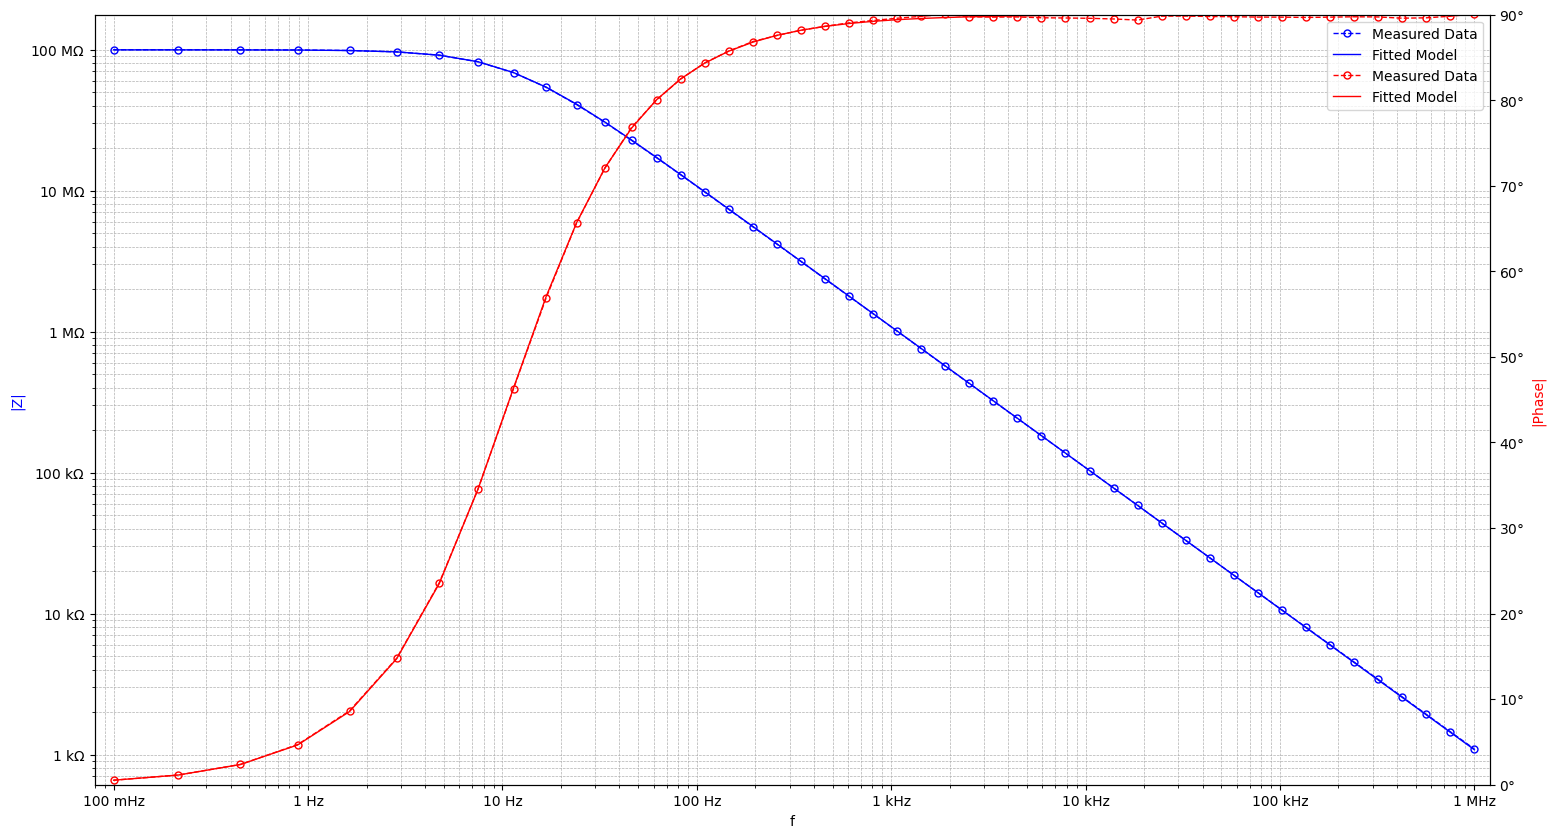

In [7]:
(fig2, (impedanceAxis2, phaseAxis2)) = EisFittingPlotter.plotBode(fittingResult)

impedanceAxis2.legend(
    impedanceAxis2.get_lines() + phaseAxis2.get_lines(),
    2 * ["Measured Data", "Fitted Model"],
)

fig2.set_size_inches(18, 10)
plt.show()

fig2.savefig(f"{foldername}/bode.svg")

# Access to model parameters

The elements and their parameters can be read with the []-operator.

For this purpose the classes in [this chapter of the API documentation](https://doc.zahner.de/zahner_analysis/file_import/index.html#models-circuits) are used.

The resistor **R0** contains a parameter **R** which contains the resistance value. This is necessary because many circuit models have several parameters. For example, a CPE has the parameters C_eq, α and f_norm.

In [8]:
fittetModel = fittingResult.getFittedModel()

print(
    f"{fittetModel['C0'].getType()}: {fittetModel['C0']['C'].getValue():1.3e} {fittetModel['C0']['C'].getUnit()}"
)
print(
    f"{fittetModel['R0'].getType()}: {fittetModel['R0']['R'].getValue():1.3e} {fittetModel['R0']['R'].getUnit()}"
)

capacitor: 1.469e-10 F
resistor: 9.959e+07 Ω
